## 1. ИНН и названия ВУЗов 
Реестр организаций, осуществляющих образовательную деятельность по имеющим государственную аккредитацию образовательным программам http://obrnadzor.gov.ru/ru/opendata/7701537808-RAOO/

In [38]:
import xml.etree.ElementTree as et
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext pycodestyle_magic
%pycodestyle_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [2]:
xml_file_name = 'obrnadzorgovru-data-20201119-structure-20160713.xml'
xml_file_path = '..\\data\\external\\' + xml_file_name

In [3]:
tree = et.parse(xml_file_path)
root = tree.getroot()

In [4]:
print('Всего организаций', len(root[0]))

Всего организаций 91576


## 1.1. Общие данные
- StatusName - Текущий статус свидетельства
- TypeName - Вид свидетельства
- RegionName - Субъект РФ
- RegionCode - Код Субъекта РФ

In [5]:
rows = []
for i in root.findall("./Certificates/Certificate"):
    status_name = getattr(i.find('StatusName'), 'text', None)
    region_name = getattr(i.find('RegionName'), 'text', None)
    region_code = getattr(i.find('RegionCode'), 'text', None)
    rows.append({'status_name': status_name,
                 'region_name': region_name,
                 'region_code': region_code})

In [6]:
df_cols = ['status_name', 'region_name', 'region_code']
out_df_certificate = pd.DataFrame(rows, columns=df_cols)

In [7]:
out_df_certificate.head()

,status_name,region_name,region_code
0,Недействующее,Тверская область,69
1,Действующее,Свердловская область,66
2,Действующее,Нижегородская область,52
3,Недействующее,Иркутская область,38
4,Недействующее,г. Москва,77


## 1.2. Данные из раздела ActualEducationOrganization

- FullName - Полное наименование
- PostAddress - Юридический адрес организации
- INN - ИНН
- FormName - Организационно правовая форма

In [9]:
rows = []
actual_path = "./Certificates/Certificate/ActualEducationOrganization"
for i in root.findall(actual_path):
    full_name = getattr(i.find('FullName'), 'text', None)
    post_address = getattr(i.find('PostAddress'), 'text', None)
    ogrn = getattr(i.find('OGRN'), 'text', None)
    inn = getattr(i.find('INN'), 'text', None)
    form_name = getattr(i.find('FormName'), 'text', None)
    rows.append({'full_name': full_name,
                 'post_address': post_address,
                 'inn': inn,
                 'form_name': form_name})

In [10]:
df_cols = ['full_name',
           'post_address',
           'inn',
           'form_name']
out_df_actual_education_organization = pd.DataFrame(rows, columns=df_cols)

In [11]:
out_df_actual_education_organization.head()

,full_name,post_address,inn,form_name
0,Муниципальное бюджетное общеобразовательное уч...,"ул. Школьная, дом 18, с. Кемцы, Бологовский ра...",6907006968,None
1,Муниципальное казенное образовательное учрежде...,"623506, Богдановичский район, с.Каменноозерско...",6605006658,None
2,Муниципальное бюджетное общеобразовательное уч...,"607047. Нижегородская область, город Выкса, се...",5247014774,None
3,Муниципальное казённое общеобразовательное учр...,"666820 Иркутская область, Мамско-Чуйский район...",3802008384,None
4,Образовательное частное учреждение высшего обр...,"127299, г. Москва, ул. Космонавта Волкова, д. 20",7720006383,Частные учреждения


## 1.3. Объединим

In [12]:
df = pd.concat((out_df_certificate,
                out_df_actual_education_organization),
               axis=1)

In [13]:
df.head()

,status_name,region_name,region_code,full_name,post_address,inn,form_name
0,Недействующее,Тверская область,69,Муниципальное бюджетное общеобразовательное уч...,"ул. Школьная, дом 18, с. Кемцы, Бологовский ра...",6907006968,None
1,Действующее,Свердловская область,66,Муниципальное казенное образовательное учрежде...,"623506, Богдановичский район, с.Каменноозерско...",6605006658,None
2,Действующее,Нижегородская область,52,Муниципальное бюджетное общеобразовательное уч...,"607047. Нижегородская область, город Выкса, се...",5247014774,None
3,Недействующее,Иркутская область,38,Муниципальное казённое общеобразовательное учр...,"666820 Иркутская область, Мамско-Чуйский район...",3802008384,None
4,Недействующее,г. Москва,77,Образовательное частное учреждение высшего обр...,"127299, г. Москва, ул. Космонавта Волкова, д. 20",7720006383,Частные учреждения


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91576 entries, 0 to 91575
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_name   91576 non-null  object
 1   region_name   90819 non-null  object
 2   region_code   90819 non-null  object
 3   full_name     91552 non-null  object
 4   post_address  91241 non-null  object
 5   inn           89825 non-null  object
 6   form_name     11947 non-null  object
dtypes: object(7)
memory usage: 4.9+ MB


## 1.4. Выберем только "status_name" == "Действующее" и "full_name" содержит "высшего"

In [15]:
df['status_name'].unique()

array(['Недействующее', 'Действующее', 'Прекращено', 'Лишен аккредитации',
       'Приостановлено'], dtype=object)

In [16]:
acting = df["status_name"] == "Действующее"
higher_education = df["full_name"].str.contains('высшего')

In [17]:
df_vuz = df[acting & higher_education].drop(['status_name'], axis=1)

In [18]:
df_vuz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 12 to 91271
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region_name   790 non-null    object
 1   region_code   790 non-null    object
 2   full_name     800 non-null    object
 3   post_address  800 non-null    object
 4   inn           800 non-null    object
 5   form_name     759 non-null    object
dtypes: object(6)
memory usage: 43.8+ KB


In [19]:
df_vuz.head()

,region_name,region_code,full_name,post_address,inn,form_name
12,Тюменская область,72,федеральное государственное казенное военное о...,"625001, г. Тюмень, улица Льва Толстого, д. 1",7203255254,федеральное государственное казенное военное о...
1109,Вологодская область,35,федеральное государственное бюджетное образова...,"162600, Вологодская область, г. Череповец, про...",3528051834,Бюджетные учреждения
2891,г. Москва,77,федеральное государственное бюджетное образова...,"117997, г. Москва, Стремянный переулок, д. 36",7705043493,федеральное государственное бюджетное учреждение
3032,"образовательные учреждения, находящиеся за пре...",90,Государственное образовательное учреждение выс...,"Республика Армения, г. Ереван, ул. Овсепа Эмин...",00053474,Бюджетные учреждения
3824,Воронежская область,36,Воронежский институт высоких технологий - авто...,"394043, г. Воронеж, ул. Ленина, д. 73а",3662006761,Автономные некоммерческие организации


In [20]:
print('Всего ВУЗов', len(df_vuz))

Всего ВУЗов 800


## 1.5. Посмотрим на организационно правовую форму (столбец form_name)

In [21]:
df_vuz['form_name'].unique()

array(['федеральное государственное казенное военное образовательное учреждение',
       'Бюджетные учреждения',
       'федеральное государственное бюджетное учреждение',
       'Автономные некоммерческие организации', 'Казенные учреждения',
       None,
       'федеральное государственное автономное образовательное учреждение',
       'автономная некоммерческая образовательная организация',
       'Частные учреждения',
       'государственное бюджетное образовательное учреждение',
       'государственное образовательное учреждение',
       'государственное учреждение',
       'государственное бюджетное учреждение',
       'федеральное государственное образовательное бюджетное учреждение',
       'федеральное государственное автономное учреждение',
       'федеральное государственное казенное учреждение',
       'некоммерческая организация', 'частное учреждение',
       'автономная некоммерческая организация',
       'частное образовательное учреждение',
       'государственное автоно

Видно, что столбец form_name заполнен небрежно и не полностью. В то же время наименование образовательной организации должно содержать указание на ее организационно-правовую форму и тип образовательной организации (согласно http://273-фз.рф/zakonodatelstvo/federalnyy-zakon-ot-29-dekabrya-2012-g-no-273-fz-ob-obrazovanii-v-rf). Поэтому удалим form_name. И извлечем нужную информацию из full_name.

In [22]:
df_vuz.drop(['form_name'], axis=1, inplace=True)

## 1.6. Извлечем информацию о категориях ВУЗов из full_name

In [23]:
vuz_type_set = set()
for name in df_vuz['full_name']:
    name = name.lower()
    name = name.replace('"', '«')
    vuz_type = name.split('«')
    vuz_type = vuz_type[0].split('высшего образования')
    # print(vuz_type[0])
    vuz_type = vuz_type[0].split(' ')
    for word in vuz_type:
        vuz_type_set.add(word)

bug_word_list = ['-', '(славянский)',
                 '', 'астраханской',
                 'воронежский', 'высшего',
                 'кыргызско-российский', 'красного',
                 'области', 'областное',
                 'образования', 'образовательная',
                 'образовательное', 'организация',
                 'ордена', 'профессионального',
                 'профсоюзов', 'российско-армянский',
                 'санкт-петербургское', 'славянский',
                 'среднего', 'тамбовское',
                 'трудового', '–',
                 'знамени', 'высоких',
                 'университет', 'институт',
                 'учреждение']

for word in bug_word_list:
    vuz_type_set.remove(word)

In [24]:
vuz_type_set

{'автономная',
 'автономное',
 'аккредитованное',
 'бюджетное',
 'военное',
 'государственное',
 'духовная',
 'инклюзивного',
 'казенное',
 'культуры',
 'межгосударственное',
 'муниципальное',
 'негосударственная',
 'негосударственное',
 'некоммерческая',
 'некоммерческое',
 'религиозная',
 'технологий',
 'федеральное',
 'частное'}

In [25]:
avtonomnaya = ['автономная',  'автономное']
akkreditovannoye = ['аккредитованное']
byudzhetnoye = ['бюджетное']
voyennoye = ['военное']
gosudarstvennoye = ['государственное']
religioznaya = ['духовная', 'религиозная']
inclusive = ['инклюзивного']
kazennoye = ['казенное']
kultury = ['культуры']
mezhgosudarstvennoye = ['межгосударственное']
munitsipalnoye = ['муниципальное']
negosudarstvennaya = ['негосударственная', 'негосударственное']
nekommercheskaya = ['некоммерческая', 'некоммерческое']
technologies = ['технологий']
federalnoye = ['федеральное']
chastnoye = ['частное']

In [26]:
categories = [avtonomnaya, akkreditovannoye,
              byudzhetnoye, voyennoye,
              gosudarstvennoye, religioznaya,
              inclusive, kazennoye, kultury,
              mezhgosudarstvennoye, munitsipalnoye,
              negosudarstvennaya, nekommercheskaya,
              technologies, federalnoye,
              chastnoye]

In [27]:
categories_names = ['is_avtonomnaya', 'is_akkreditovannoye',
                    'is_byudzhetnoye', 'is_voyennoye',
                    'is_gosudarstvennoye', 'is_religioznaya',
                    'is_inclusive', 'is_kazennoye', 'is_kultury',
                    'is_mezhgosudarstvennoye', 'is_munitsipalnoye',
                    'is_negosudarstvennaya', 'is_nekommercheskaya',
                    'is_technologies', 'is_federalnoye',
                    'is_chastnoye']

In [28]:
for cats, cats_name in zip(categories, categories_names):
    mask = df_vuz["full_name"].str.contains(cats[0])
    if len(cats) > 1:
        mask = mask + df_vuz["full_name"].str.contains(cats[1])
    df_vuz[cats_name] = mask

C:\Users\bobkova-ao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
C:\Users\bobkova-ao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
C:\Users\bobkova-ao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
C:\Users\bobkova-ao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\c

In [29]:
df_vuz[categories_names].head()

,is_avtonomnaya,is_akkreditovannoye,is_byudzhetnoye,is_voyennoye,is_gosudarstvennoye,is_religioznaya,is_inclusive,is_kazennoye,is_kultury,is_mezhgosudarstvennoye,is_munitsipalnoye,is_negosudarstvennaya,is_nekommercheskaya,is_technologies,is_federalnoye,is_chastnoye
12,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False
1109,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
2891,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
3032,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3824,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


## 1.7. Визуализируем связь между выделенными категориями

In [30]:
X = df_vuz[categories_names]

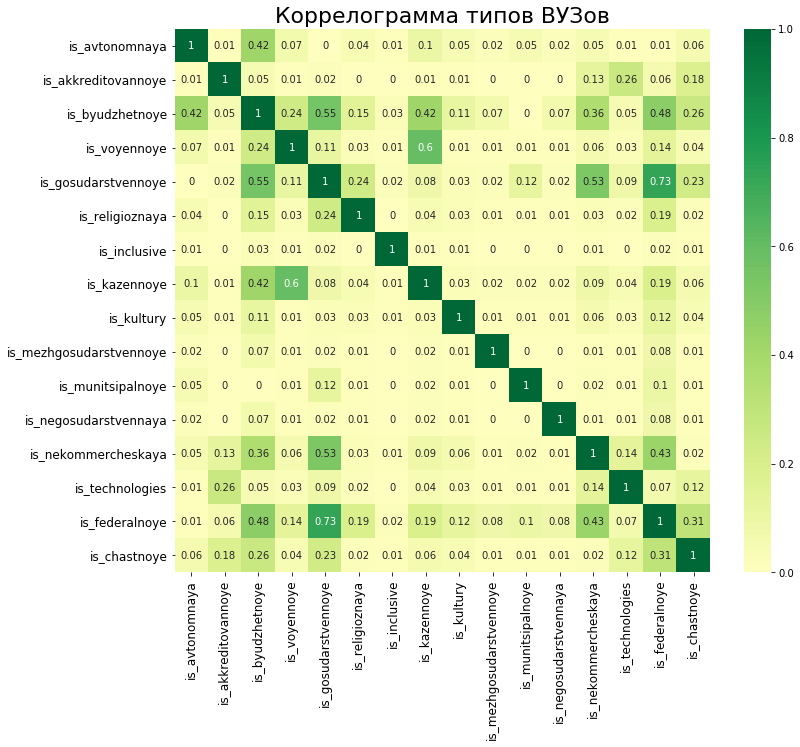

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(abs(X.corr().round(2)),
            xticklabels=X.corr().columns,
            yticklabels=X.corr().columns,
            cmap='RdYlGn',
            center=0,
            annot=True)
plt.title('Коррелограмма типов ВУЗов', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('..\\reports\\figures\\vuz-types-correlogram.png', dpi=100)
plt.show()

## 1.8. Посчитаем, сколько вузов каждой категории

In [32]:
X.sum()

is_avtonomnaya              74
is_akkreditovannoye          1
is_byudzhetnoye            505
is_voyennoye                39
is_gosudarstvennoye        642
is_religioznaya             11
is_inclusive                 1
is_kazennoye                75
is_kultury                  37
is_mezhgosudarstvennoye      2
is_munitsipalnoye            3
is_negosudarstvennaya        2
is_nekommercheskaya         56
is_technologies             15
is_federalnoye             569
is_chastnoye                30
dtype: int64

## Дополним поле с кодом региона

Для 10 ВУЗов в поле region_code нет информации.

In [34]:
df_vuz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 12 to 91271
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   region_name              790 non-null    object
 1   region_code              790 non-null    object
 2   full_name                800 non-null    object
 3   post_address             800 non-null    object
 4   inn                      800 non-null    object
 5   is_avtonomnaya           800 non-null    bool  
 6   is_akkreditovannoye      800 non-null    bool  
 7   is_byudzhetnoye          800 non-null    bool  
 8   is_voyennoye             800 non-null    bool  
 9   is_gosudarstvennoye      800 non-null    bool  
 10  is_religioznaya          800 non-null    bool  
 11  is_inclusive             800 non-null    bool  
 12  is_kazennoye             800 non-null    bool  
 13  is_kultury               800 non-null    bool  
 14  is_mezhgosudarstvennoye  800 non-null  

In [45]:
region_code_null = pd.isnull(df_vuz['region_code'])

In [49]:
df_vuz[region_code_null]['post_address'].values

array(['295021, Российская Федерация, Республика Крым, г. Симферополь, ул. Крымской правды,  дом 4',
       '295015, Республика Крым, г. Симферополь, переулок Учебный, д. 8',
       '295015, Республика Крым, г. Симферополь, переулок Учебный, д. 8',
       '299028, г. Севастополь,  улица Павла Дыбенко, дом 1, корпус А',
       '295007, Республика Крым, г. Симферополь, проспект академика Вернадского, 4',
       '299053, г. Севастополь, ул. Университетская, д. 33',
       '295007, Республика Крым, г. Симферополь, проспект академика Вернадского, 4',
       '298309, Республика Крым, г. Керчь, ул. Орджоникидзе, д. 82',
       '299053, г. Севастополь, ул. Университетская, д. 33',
       '295017, Республика Крым, г. Симферополь, ул. Киевская, д. 39'],
      dtype=object)

In [ ]:
https://shuchkin.ru/2020/01/kody-regionov-rossii-i-pochtovye-indeksy-region-po-indeksu/